#<font style: color='lime'> Clasificación </font>

En este colab se van a encontrar con un problema de clasificación con tres posibles salidas, es decir la variable explicada `y` puede tomar tres valores categoricos (cualitativos) en este caso.

[Iris dataset](https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv)

Este dataset es un recopilación de datos de flores de 3 tipos: setosa, versicolor, and virginica.

La idea es que con las medidas del sepalo (ancho,alto) y del petalo (ancho,alto)
podemos entrenar un modelo de clasificación para que aprenda a distinguir entre estos 3 tipos de flores.

Para investigar acerca del dataset: [link](https://archive.ics.uci.edu/ml/datasets/iris)

## Descargamos el dataset

In [1]:
!wget https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv

--2023-09-23 16:48:32--  https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4617 (4.5K) [text/plain]
Saving to: ‘IRIS.csv’

IRIS.csv            100%[===================>]   4.51K  --.-KB/s    in 0s      

2023-09-23 16:48:32 (24.8 MB/s) - ‘IRIS.csv’ saved [4617/4617]



## Inspeccionamos el dataset

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
iris = pd.read_csv('IRIS.csv')
iris.head(3) #Observamos los 3 primeros registros con la función .head(), también pueden usar .tail() para ver los ultimos

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


>**Nota:** Podemos observar que las variables explicativas son 4: sepal_length, sepal_width, petal_lenght y petal_width, donde sus datos son del tipo flotantes, sin valores nulos. Estos simplifica el proceso de limpieza de datos. La variable explicada en este caso es species que contiene el nombre de cada especie.

In [6]:
# Vemos la cantidad de registros para cada especie
iris['species'].value_counts() #también pueden usar el argumento True -> .value_counts(True) para ver de forma proporcional los datos

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

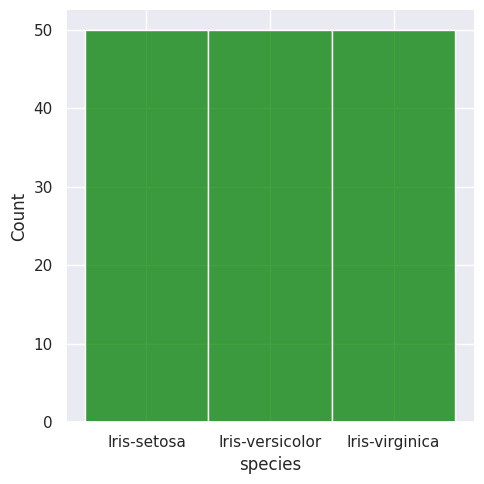

In [7]:
sns.displot(iris['species'],color='green');

>**Nota:** Observamos que el dataset esta `balanceado`, es decir, tiene la misma cantidad de registros para cada especie lo cual resulta beneficioso para eviatr que el modelo caiga en un mal aprendizaje.

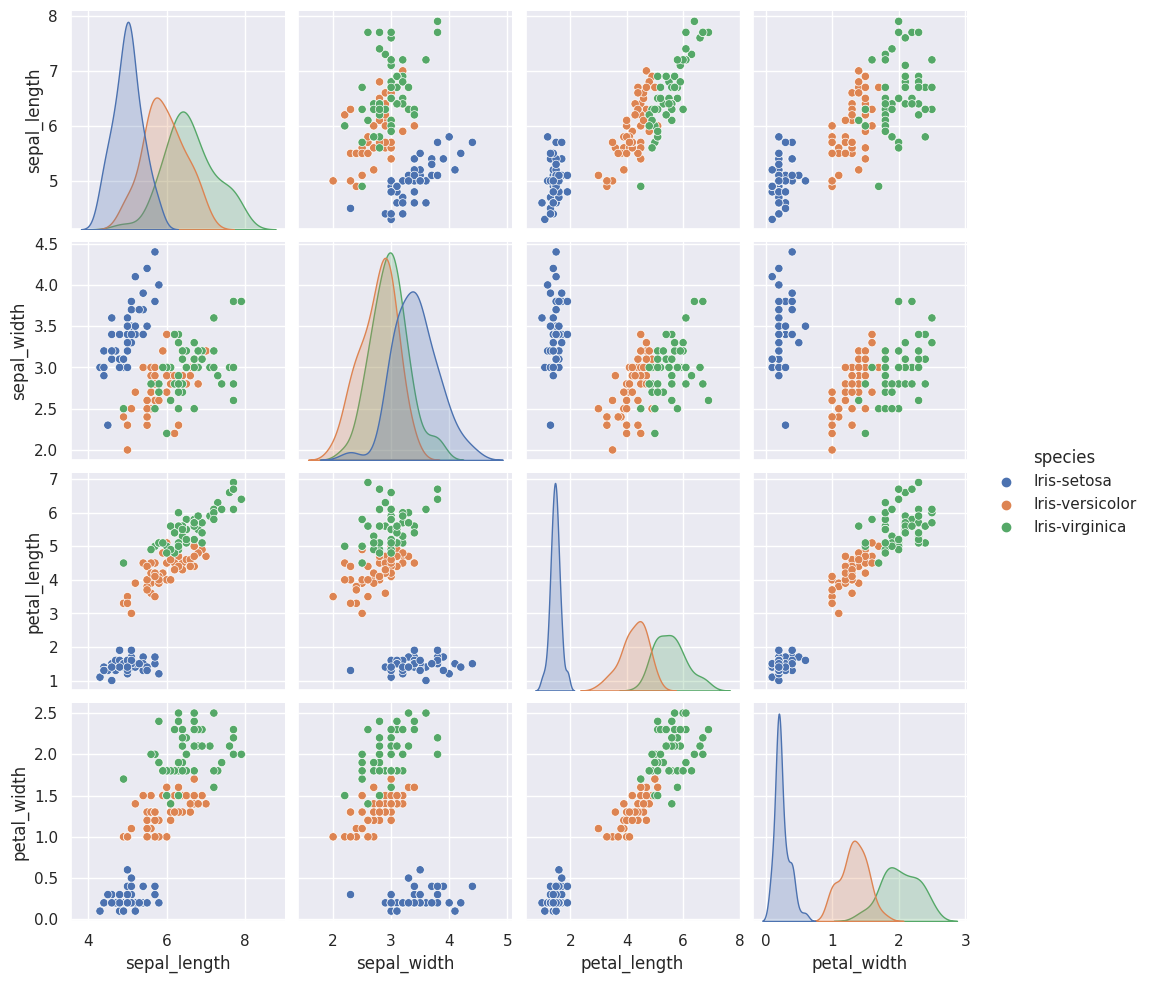

In [8]:
# Podemos usar un pairplot para correlacionar las variables explicativas
sns.pairplot(data=iris,hue='species')

## Armamos el dataset para entrenar

In [9]:
X = iris.drop(columns='species').to_numpy()
y = iris['species'].to_numpy()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state=42)

print(f"Set de entenamiento: {Xtrain.shape}, {ytrain.shape}")
print(f"Set de testeo: {Xtest.shape}, {ytest.shape}")

Set de entenamiento: (112, 4), (112,)
Set de testeo: (38, 4), (38,)


## Entrenamos el modelo Logistic Regression

El modelo logistic regression está construido para optimizar los párametros mediante el error de la función `BinaryCrossEntropy` para lo cual sería ideal dos clases.

Cuando existen más clases lo que hace es hacer en cada iteración una `clase vs todas las otras`de esta manera conserva el mismo principio.

Para setear el algoritmo en sklearn de logistic regression aplicado a multiclase, como en este caso que son 3 clases de flores, usamos el parametro `multi_class: {‘auto’, ‘ovr’, ‘multinomial’}` seteado en 'multinomial'.

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial')
log_reg.fit(Xtrain,ytrain)

LogisticRegression(multi_class='multinomial')

## Evaluamos el modelo

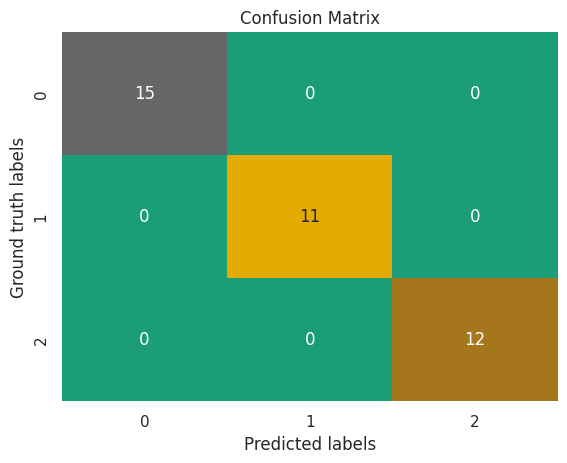

In [11]:
from sklearn import metrics as ms
y_pred_logreg = log_reg.predict(Xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_logreg)
sns.heatmap(confusion_matrix,annot=True,cbar=False,cmap='Dark2')
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix");

In [12]:
acc_logreg = ms.accuracy_score(y_true = ytest, y_pred = y_pred_logreg)
precision_logreg = ms.precision_score(y_true = ytest, y_pred = y_pred_logreg,average='weighted')
recall_logreg = ms.recall_score(y_true = ytest, y_pred = y_pred_logreg,average='weighted')
f1_logreg = ms.f1_score(y_true = ytest, y_pred = y_pred_logreg,average='weighted')

logreg_metrics = {"Accuracy":acc_logreg,
                  "Precision":precision_logreg,
                  "Recall":recall_logreg,
                  "F1":f1_logreg}
logreg_metrics

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0}

## Predicción

Tomamos un conjunto de datos que represente las variables de entradas para ver que nos devuelve el modelo.

La idea es simular al modelo tomando datos nuevos, ya sea através de algun sensor de los datos:

* sepal_length
* sepal_width
* petal_length
* petal_width

In [13]:
#Creamos datos nuevos
X_prueba = np.array([[3.4, 1.9, 1.2, 0.3]]) # en el array tenemos: sepal_length,	sepal_width,	petal_length,	petal_width

#Luego predecimos
y_pred = log_reg.predict(X_prueba)

#Observamos la salida
print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: ['Iris-setosa']




---



# Naive Bayes

Ahora el ejercicio es que repitan la experiencia que se realizó con Logistic Regression.

Para eso deben:
1. Explorar el dataset por su cuenta.
2. Anotar observaciones que ustedes concluyan.
3. Armar el dataset para entrenar y testear.
4. Implementar el algoritmo de Naive Bayes -> [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
5. Evaluarlo con las metricas que hemos visto (ROC-AUC es solo para clasificación binaria).
6. Hacer un predicción.

In [14]:
!wget https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv

--2023-09-23 16:48:50--  https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4617 (4.5K) [text/plain]
Saving to: ‘IRIS.csv.1’

IRIS.csv.1          100%[===================>]   4.51K  --.-KB/s    in 0s      

2023-09-23 16:48:50 (63.8 MB/s) - ‘IRIS.csv.1’ saved [4617/4617]



## 1. Cargamos el dataset

In [15]:
import pandas as pd
import numpy as np
data = pd.read_csv('IRIS.csv')
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## 2. Analizamos el dataset

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
import seaborn as sns
sns.set()

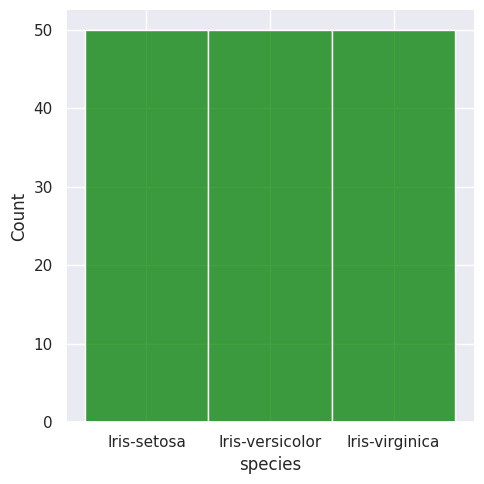

In [18]:
sns.displot(data['species'], color='green')

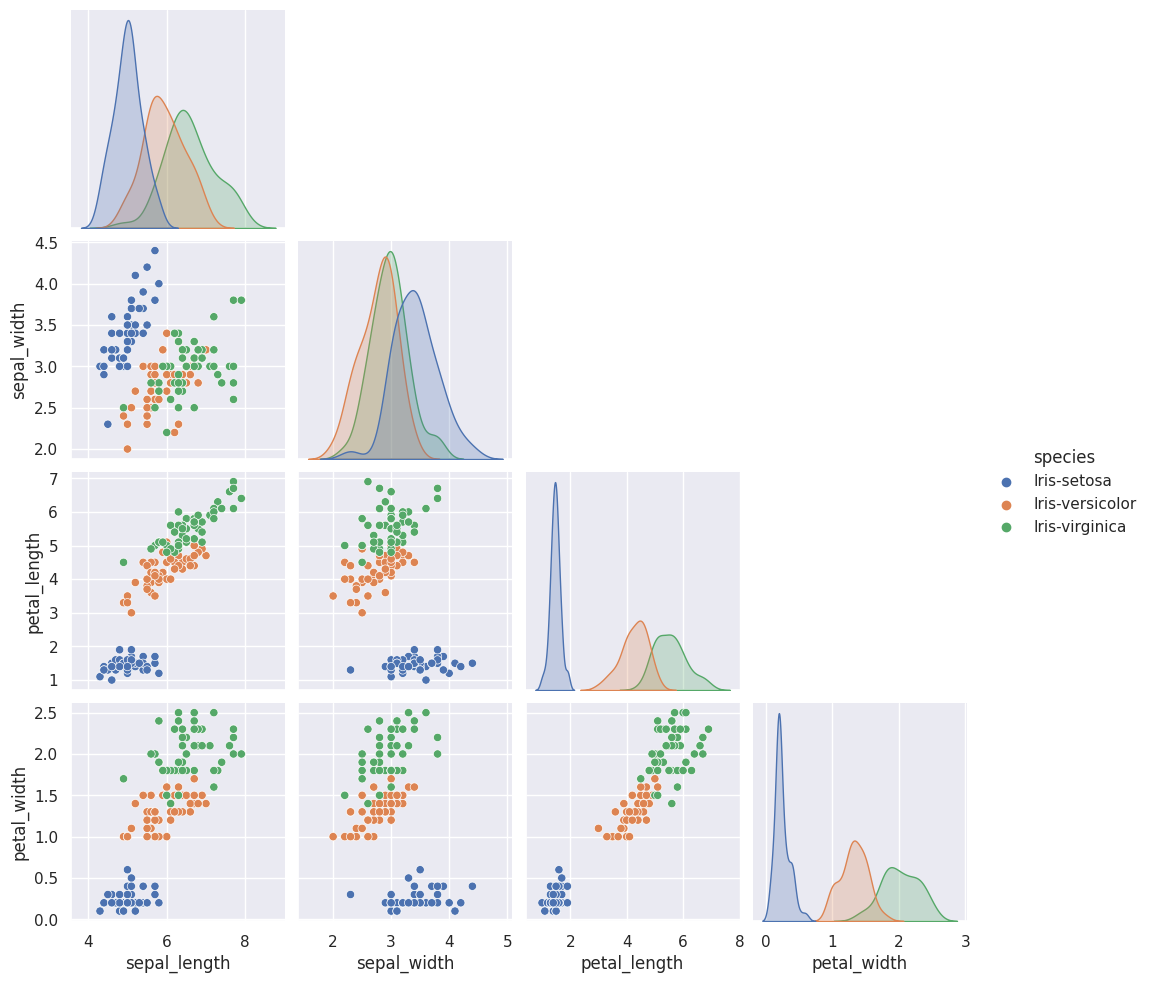

In [19]:
sns.pairplot(data, hue='species', corner=True)

<ipython-input-20-7eed9bfd49a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True)


<Axes: >

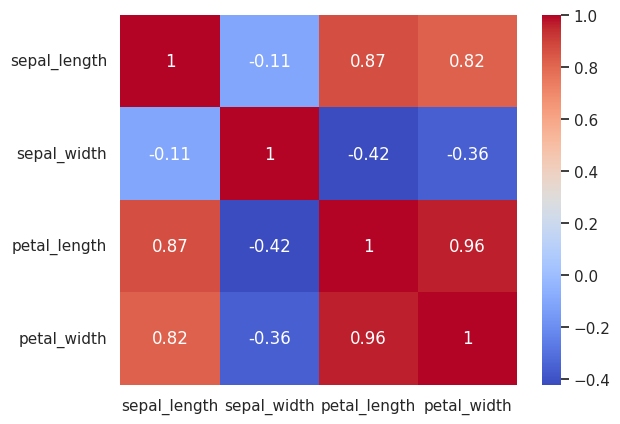

In [20]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

## 3. Separamos el dataset en entrenamiento y testeo

In [21]:
x = data.drop(columns='species').to_numpy()
y = data['species'].to_numpy()

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, stratify=y, random_state=42)
print(f"Set de entrenamiento {xtrain.shape}, {ytrain.shape}")
print(f"Set de testeo {xtest.shape}, {ytest.shape}")

Set de entrenamiento (112, 4), (112,)
Set de testeo (38, 4), (38,)


## 4. Entrenamos el modelo

In [23]:
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

model_naive = make_pipeline(MinMaxScaler(), MultinomialNB())
model_naive.fit(xtrain, ytrain)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('multinomialnb', MultinomialNB())])

## 5. Evaluamos el modelo

In [24]:
print(f"R2 en entrenamiento: {model_naive.score(xtrain, ytrain)}")
print(f"R2 en testeo: {model_naive.score(xtest, ytest)}")

R2 en entrenamiento: 0.7678571428571429
R2 en testeo: 0.8157894736842105


Text(0.5, 1.0, 'Confusion Matrix')

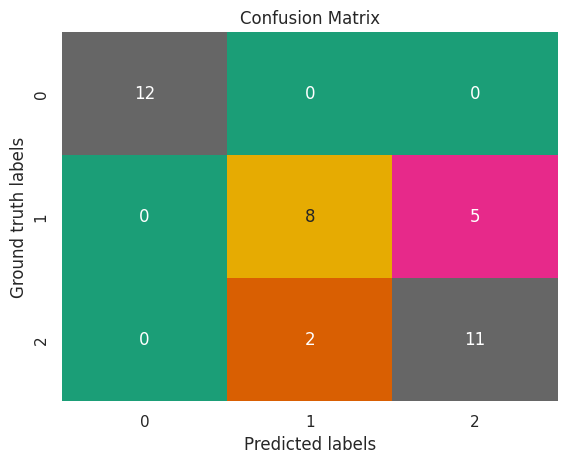

In [25]:
from sklearn import metrics as ms

y_pred_naive = model_naive.predict(xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_naive)
sns.heatmap(confusion_matrix, annot=True, cbar=False, cmap='Dark2')
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix")

## 6. Evaluamos las metricas

In [26]:
acc_naive = ms.accuracy_score(y_true = ytest, y_pred = y_pred_naive)
precision_naive = ms.precision_score(y_true = ytest, y_pred = y_pred_naive, zero_division=0, average='weighted')
recall_naive = ms.recall_score(y_true = ytest, y_pred = y_pred_naive, zero_division=0, average='weighted')
f1_naive = ms.f1_score(y_true = ytest, y_pred = y_pred_naive, zero_division=0, average='weighted')

naive_metrics = {"Accuracy":acc_naive,
                 "Precision":precision_naive,
                 "Recall":recall_naive,
                 "F1":f1_naive}
naive_metrics

{'Accuracy': 0.8157894736842105,
 'Precision': 0.8246710526315789,
 'Recall': 0.8157894736842105,
 'F1': 0.8133038743786001}

## 7. Realizamos una predicción

In [27]:
#Creamos datos nuevos
X_prueba = np.array([[3.5, 1.2, 1.6, 0.9]]) # en el array tenemos: sepal_length,	sepal_width,	petal_length,	petal_width

#Luego predecimos
y_pred = model_naive.predict(X_prueba)

#Observamos la salida
print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: ['Iris-virginica']


## 8. Comparamos los 2 modelos

<Axes: >

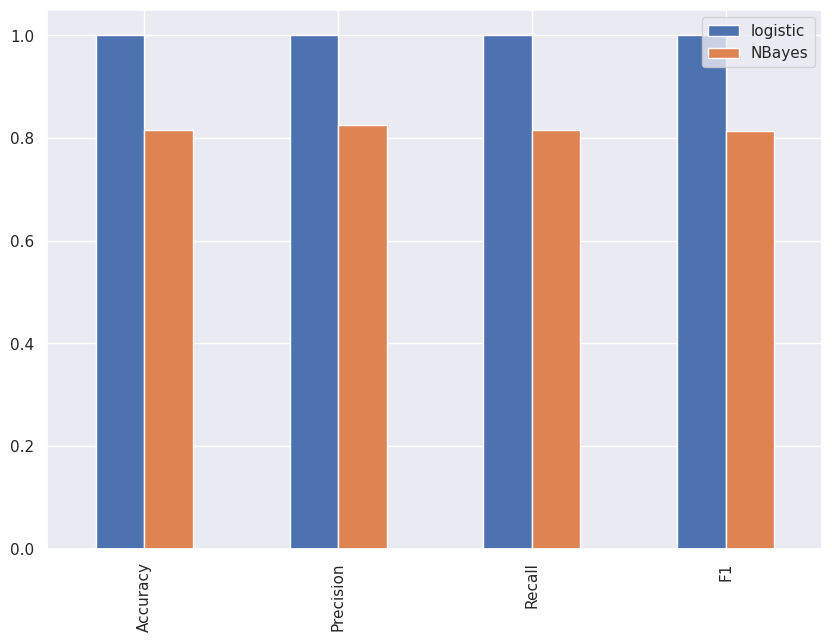

In [28]:
pd.DataFrame({"logistic":logreg_metrics, "NBayes":naive_metrics}).plot(kind='bar', figsize=(10,7))

**Al comparar los dos modelos podemos observar que el mejor de estos es el modelo de regresión logistica.**



---


> 🦾 **Ejercicio Extra:** Si te animas te dejo el link para implementar un algoritmo de ensamble del tipo *Boosting* en este [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). Podes repetir los pasos igual que en `Naive Bayes` y comparar cuál de los 3 te dio mejores métricas. Suerte 🤙

# Boosting

## 1. Entrenamos el modelo

In [29]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model_abc = abc.fit(xtrain, ytrain)

## 2. Evaluamos el modelo

In [30]:
print(f"R2 en entrenamiento: {model_abc.score(xtrain, ytrain)}")
print(f"R2 en testeo: {model_abc.score(xtest, ytest)}")

R2 en entrenamiento: 0.9642857142857143
R2 en testeo: 0.8947368421052632


Text(0.5, 1.0, 'Confusion Matrix')

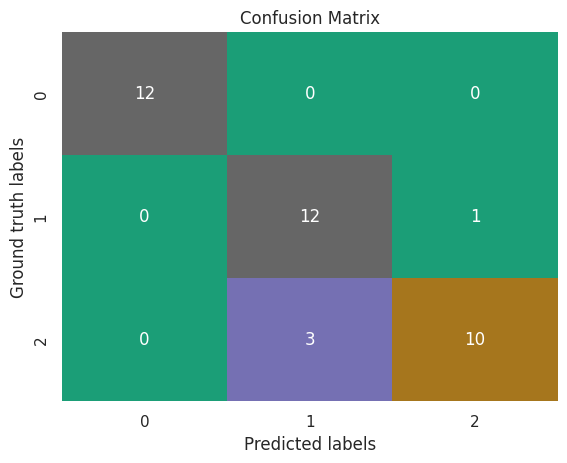

In [31]:
y_pred_abc = model_abc.predict(xtest)
confusion_matrix = ms.confusion_matrix(y_true = ytest, y_pred = y_pred_abc)
sns.heatmap(confusion_matrix, annot=True, cbar=False, cmap='Dark2')
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth labels")
plt.title("Confusion Matrix")

## 3. Evaluamos las metricas

In [32]:
acc_abc = ms.accuracy_score(y_true = ytest, y_pred = y_pred_abc)
precision_abc = ms.precision_score(y_true = ytest, y_pred = y_pred_abc, zero_division=0, average='weighted')
recall_abc = ms.recall_score(y_true = ytest, y_pred = y_pred_abc, zero_division=0, average='weighted')
f1_abc = ms.f1_score(y_true = ytest, y_pred = y_pred_abc, zero_division=0, average='weighted')

abc_metrics = {"Accuracy":acc_abc,
                 "Precision":precision_abc,
                 "Recall":recall_abc,
                 "F1":f1_abc}
abc_metrics

{'Accuracy': 0.8947368421052632,
 'Precision': 0.9004784688995215,
 'Recall': 0.8947368421052632,
 'F1': 0.894110275689223}

## 4. Realizamos una predicción

In [33]:
#Creamos datos nuevos
X_prueba = np.array([[5.4, 2.1, 1.5, 0.1]]) # en el array tenemos: sepal_length,	sepal_width,	petal_length,	petal_width

#Luego predecimos
y_pred = model_abc.predict(X_prueba)

#Observamos la salida
print(f"Predicción del modelo: {y_pred}")

Predicción del modelo: ['Iris-setosa']


## 5. Comparamos las 3 metricas

<Axes: >

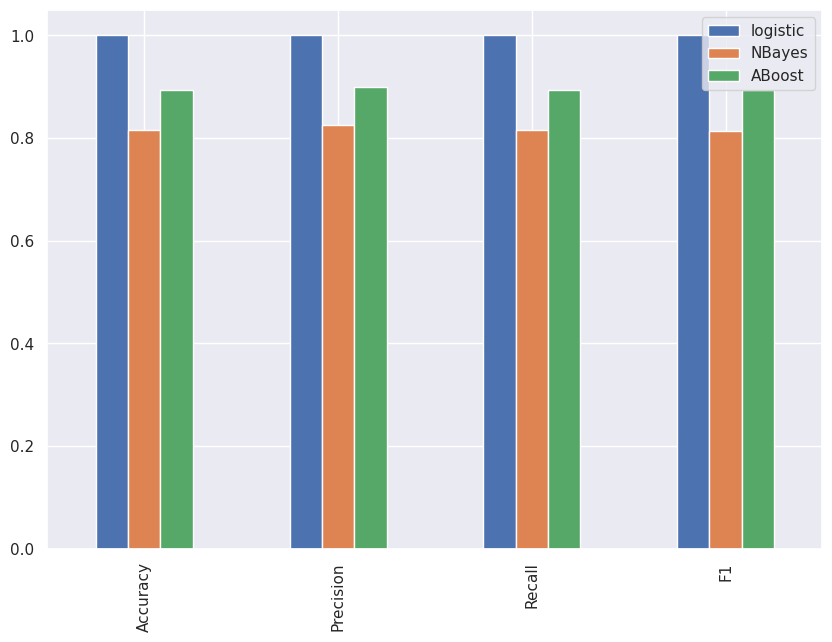

In [34]:
pd.DataFrame({"logistic":logreg_metrics, "NBayes":naive_metrics, "ABoost":abc_metrics}).plot(kind='bar', figsize=(10,7))

🤓👆 **Al comparar los tres modelos podemos observar que el modelo de boosting es mejor que el modelo de naive bayes, pero el mejor modelo de estos tres sigue siendo el modelo de regresión logística.**